In [80]:
import numpy as np
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
df = pd.read_csv('train.csv')
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [13]:
df=df.dropna()
x = df.drop("label",axis=1)
y = df['label']

In [20]:
message = df.copy()

In [25]:
message.reset_index(inplace=True)

In [36]:
ps=PorterStemmer()
corpus = []
for i in range(0,len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['title'][i])
    review = review.lower().split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [39]:
corpus2 = corpus.copy()   #since the data is too big, it is better to keep a backup

In [40]:
cv = CountVectorizer(max_features=5000, ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [44]:
Y = message['label']

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33, random_state=2)

In [52]:
#cv.get_params()

In [64]:
x_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
x_df.head()

,abandon,abc,abc news,abduct,abe,abedin,abl,abort,abroad,absolut,...,zero,zika,zika viru,zionist,zone,zone new,zone new york,zoo,zu,zuckerberg
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
mb = MultinomialNB()
mb.fit(X_train, y_train)

MultinomialNB()

In [69]:
y_preds = mb.predict(X_test)
print(accuracy_score(y_test, y_preds))

0.9060480530240265


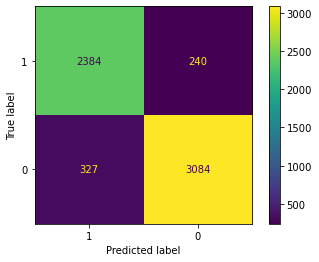

In [74]:
cm = confusion_matrix(y_test, y_preds)
plot_confusion_matrix(mb,X_test, y_test, labels=[1, 0])

**Using Passive Aggressive Classifier Algorithm**

In [76]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa = PassiveAggressiveClassifier()

In [78]:
pa.fit(X_train, y_train)
y_pred_pa = pa.predict(X_test)
accuracy_score(y_pred_pa, y_test)

0.9219552609776305

**Tuning the value of Alpha in Multinomial Classifier**

In [79]:
clf = MultinomialNB(alpha=0.1)

In [81]:
score = 0
for alpha in np.arange(0,1,0.1):
    sub_clf = MultinomialNB(alpha=alpha)
    sub_clf.fit(X_train, y_train)
    pred = sub_clf.predict(X_test)
    scr = accuracy_score(y_test, pred)
    if scr > score:
        clf = sub_clf
    print("Alpha: {}, Score: {}".format(alpha, scr))
    

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\naive_bayes.py:508: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn('alpha too small will result in numeric errors, '


Alpha: 0.0, Score: 0.8946147473073737
Alpha: 0.1, Score: 0.9075393537696769
Alpha: 0.2, Score: 0.9072079536039768
Alpha: 0.30000000000000004, Score: 0.9070422535211268
Alpha: 0.4, Score: 0.9065451532725767
Alpha: 0.5, Score: 0.9062137531068766
Alpha: 0.6000000000000001, Score: 0.9063794531897266
Alpha: 0.7000000000000001, Score: 0.9062137531068766
Alpha: 0.8, Score: 0.9057166528583265
Alpha: 0.9, Score: 0.9057166528583265


In [82]:
clf.coef_

C:\Users\DELL\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:101: FutureWarning: Attribute coef_ was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


array([[ -9.10195943,  -8.50514335,  -9.33021808, ..., -10.79655515,
         -8.50514335,  -9.62648389]])